In [1]:
import numpy as np
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn import metrics
from cw2_utils import load_cw2_data, get_features
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
train_set, test_set, train_labels, test_labels = load_cw2_data()
features = get_features()
print(train_set.shape, test_set.shape)
print(features)

(118, 13) (60, 13)
['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [3]:
train_mean = np.mean(train_set, axis = 0)
train_std = np.std(train_set, axis = 0)
train_set = (train_set - train_mean) / train_std
test_set = (test_set - train_mean) / train_std

/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


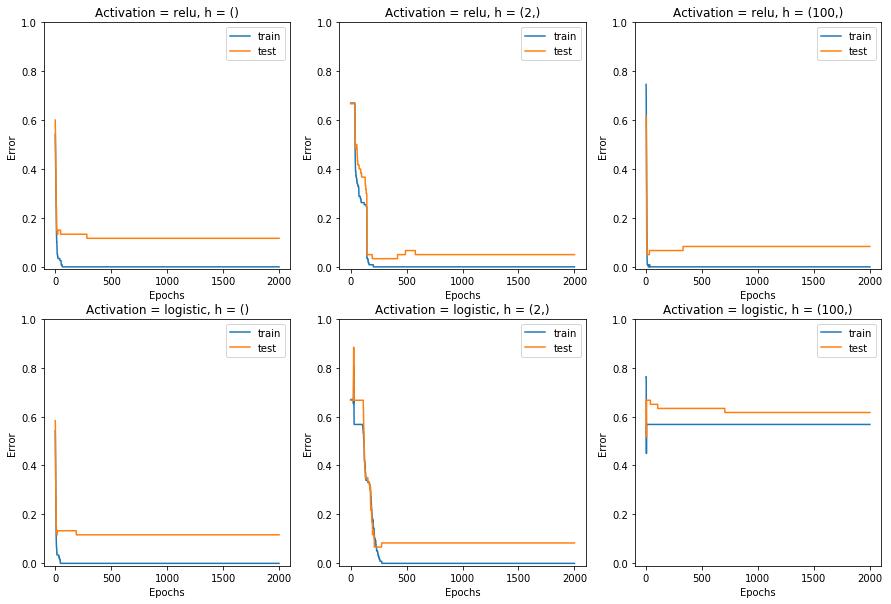

In [4]:
maxiter = 1
totalmaxiter = 2000
f, axes = plt.subplots(2, 3, figsize = (15,10))
for x, activation in enumerate(['relu', 'logistic']):
    for y, h in enumerate([(), (2,), (100,)]):
        error_train = []
        error_test = []
        mlp = MLPClassifier(hidden_layer_sizes=h, solver='sgd', max_iter=maxiter, verbose=False, warm_start=True, 
            activation=activation, learning_rate_init = 0.01, learning_rate = 'adaptive', tol=0, random_state=56)
        for _ in range(int(totalmaxiter/maxiter)):
            mlp.fit(train_set,train_labels)
            error_train.append(1-mlp.score(train_set, train_labels))
            error_test.append(1-mlp.score(test_set, test_labels))
        
        axes[x][y].plot(range(1,totalmaxiter+1, maxiter), error_train)
        axes[x][y].plot(range(1,totalmaxiter+1, maxiter), error_test)
        axes[x][y].set_xlabel('Epochs')
        axes[x][y].set_ylabel('Error')
        axes[x][y].set_ylim( -0.01,1 )
        axes[x][y].set_title('Activation = {}, h = {}'.format(activation, h))
        axes[x][y].legend(['train', 'test'])

In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(2), solver='sgd', max_iter=13000, verbose=False, 
            activation='relu', learning_rate_init = 0.001, learning_rate = 'adaptive', random_state=56)
start = time.time()
mlp.fit(train_set,train_labels)
end = time.time()
print(end - start)
mlp.score(test_set, test_labels)

0.567781925201416


0.96666666666666667

In [6]:
# learningrate_range = np.logspace(-4,2, num=10) 
# maxiter_range = range(1,100,10) # *100
# Z = []

# fig = plt.figure()
# ax = fig.gca(projection='3d')

# for learningrate in learningrate_range:
#     tmp = []
#     for maxiter in maxiter_range:
#         mlp = MLPClassifier(hidden_layer_sizes=(10, 10), solver='sgd', max_iter=maxiter*10, 
#                             learning_rate_init = learningrate, learning_rate='constant', verbose=False, random_state=0)
#         mlp.fit(train_set,train_labels)
#         tmp.append(1 - mlp.score(test_set, test_labels))
#     Z.append(tmp)
     
        

# Z = np.asarray(Z).T
# learningrate_range, maxiter_range = np.meshgrid(learningrate_range, maxiter_range)  

# fig, ax = plt.subplots()
# CS = ax.contour(learningrate_range, maxiter_range*10, Z)
# ax.clabel(CS, inline=1, fontsize=10)
# ax.set_xlabel('learning rate')
# ax.set_xscale('log')
# ax.set_ylabel('max iter')


# # print(learningrate_range.shape, maxiter_range.shape, Z.shape)
# # surf = ax.plot_surface(learningrate_range/10000, maxiter_range*10, Z, cmap=cm.coolwarm,
# #                        linewidth=0, antialiased=False)
# # ax.set_xlabel('learning rate')
# # ax.set_ylabel('max iter')
# plt.show()



In [145]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), solver='sgd', max_iter=15, verbose=False, 
            activation='relu', learning_rate_init = 0.01, learning_rate = 'adaptive', tol=0, random_state=56)
start = time.time()
mlp.fit(train_set,train_labels)
end = time.time()
print(end - start)
print(mlp.score(test_set,test_labels))


0.05010819435119629
1.0


/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[ 0.91666667  0.9         0.93333333]
 [ 0.9         0.91666667  0.9       ]
 [ 0.91666667  0.9         0.9       ]
 [ 0.9         0.9         0.91666667]
 [ 0.9         0.91666667  0.9       ]
 [ 0.9         0.9         0.91666667]
 [ 0.91666667  0.91666667  0.91666667]
 [ 0.9         0.9         0.9       ]
 [ 0.95        0.9         0.9       ]
 [ 0.33333333  0.66666667  0.65      ]]
Score 0.65: 
Best L2 Pen: 0.0005
Best Activation Function: logistic


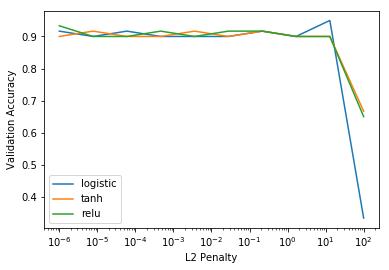

In [131]:
# with hidden layer
score = 0
l2_range = np.logspace(-6,2, num=10)
test_error = []
for l2pen in l2_range:
    tmp = []
    for activation in ['logistic', 'tanh', 'relu']:    
        mlp = MLPClassifier(hidden_layer_sizes=(100), solver='sgd', max_iter=300, 
                            learning_rate_init= 0.01, learning_rate='adaptive', 
                            alpha=l2pen, random_state=None, activation = activation)
        mlp.fit(train_set,train_labels)
        score = mlp.score(test_set, test_labels)
        tmp.append(score)
    test_error.append(tmp)

test_error = np.array(test_error)
print(test_error)    
plt.semilogx(l2_range, test_error[:,0])
plt.semilogx(l2_range, test_error[:,1])
plt.semilogx(l2_range, test_error[:,2])
plt.legend(['logistic','tanh','relu'])
plt.xlabel('L2 Penalty')
plt.ylabel('Validation Accuracy')

print('Score {}: '.format(score))
print('Best L2 Pen: {}'.format(best_l2pen/100000))
print('Best Activation Function: {}'.format(best_activation))


/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


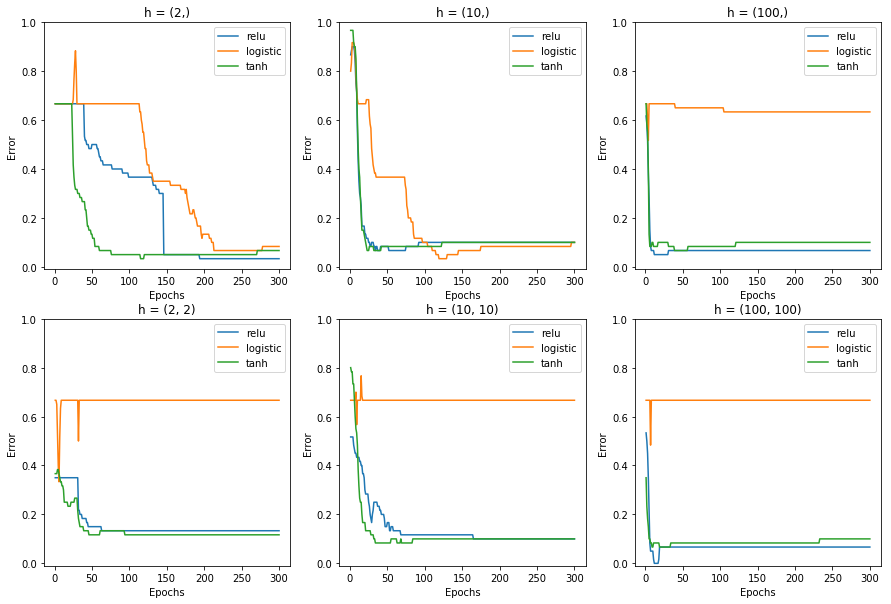

In [9]:
maxiter = 1
totalmaxiter = 300
f, axes = plt.subplots(2, 3, figsize = (15,10))
for x, h in enumerate([(2,), (10,), (100,), (2,2), (10,10), (100,100)]):
    error_mult = []
    for y, activation in enumerate(['relu', 'logistic', 'tanh']):
        error_test = []
        mlp = MLPClassifier(hidden_layer_sizes=h, solver='sgd', max_iter=maxiter, verbose=False, warm_start=True, 
            activation=activation, learning_rate_init = 0.01, learning_rate = 'adaptive', tol=0, random_state=56)
        
        for _ in range(int(totalmaxiter/maxiter)):
            mlp.fit(train_set,train_labels)
            error_test.append(1-mlp.score(test_set, test_labels))
        
        error_mult.append(error_test)
        
    axes[x//3][x%3].plot(range(1,totalmaxiter+1, maxiter), error_mult[0])
    axes[x//3][x%3].plot(range(1,totalmaxiter+1, maxiter), error_mult[1])
    axes[x//3][x%3].plot(range(1,totalmaxiter+1, maxiter), error_mult[2])
    axes[x//3][x%3].set_xlabel('Epochs')
    axes[x//3][x%3].set_ylabel('Error')
    axes[x//3][x%3].set_ylim( -0.01,1 )
    axes[x//3][x%3].set_title('h = {}'.format(h))
    axes[x//3][x%3].legend(['relu', 'logistic', 'tanh'])

[ 0.88666667  0.89833333  0.89666667  0.89666667  0.9         0.88833333
  0.90166667  0.90333333  0.90666667  0.93666667]
Score 0.9333333333333333: 
Best L2 Pen: 0.0005
Best Activation Function: logistic


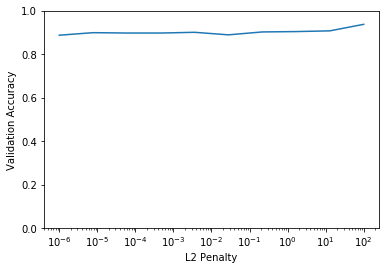

In [91]:
# without hidden layer
score = 0
l2_range = np.logspace(-6,2, num=10)
test_error = []
for l2pen in l2_range:
    tmp = 0
    for activation in range(10):    
        mlp = MLPClassifier(hidden_layer_sizes=(), solver='sgd', max_iter=300, 
                            learning_rate_init= 0.01, learning_rate='adaptive', 
                            alpha=l2pen, random_state=None)
        mlp.fit(train_set,train_labels)
        score = mlp.score(test_set, test_labels)
        tmp += score
    test_error.append(tmp/10)

test_error = np.array(test_error)
print(test_error)    
plt.semilogx(l2_range, test_error)
plt.xlabel('L2 Penalty')
plt.ylabel('Validation Accuracy')
plt.ylim([0,1])

print('Score {}: '.format(score))
print('Best L2 Pen: {}'.format(best_l2pen/100000))
print('Best Activation Function: {}'.format(best_activation))

In [11]:
max_r = 0
for r in range (100):
    mlp = MLPClassifier(hidden_layer_sizes=(2), solver='sgd', max_iter=8000, verbose=False, 
                        learning_rate_init = 0.001, learning_rate = 'adaptive', alpha=0.003, random_state=r)
    mlp.fit(train_set,train_labels)
    mlp.score(test_set, test_labels)
    if mlp.score(test_set, test_labels) > max_r:
        max_r = mlp.score(test_set, test_labels)
        best_r = r

print(max_r)
best_r

0.966666666667


56

/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

ValueError: x and y must have same first dimension, but have shapes (30,) and (300,)

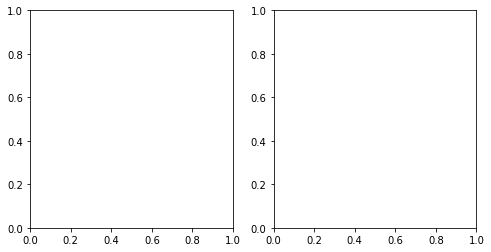

In [49]:
avg_times = []
times = []
scores = []
for i, epoch in enumerate(range(1, 301, 10)): 
    avg_time = 0
    for _ in range(10):

        mlp = MLPClassifier(hidden_layer_sizes=(2), solver='sgd', max_iter=epoch, verbose=False, 
                            learning_rate_init = 0.01, learning_rate = 'adaptive', alpha=0.0003, 
                            random_state=56, tol=0)
        start = time.time()
        mlp.fit(train_set,train_labels)
        end = time.time()
        avg_time += (end - start)

        scores.append(mlp.score(test_set, test_labels))
        
    
    avg_times.append(avg_time/10)

f, axes = plt.subplots(1, 2, figsize = (8,4))
axes[0].plot(range(1, 301, 10), scores)
axes[1].plot(range(1, 301, 10), avg_times)

